In [524]:
# Import các thư viện cần thiết
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from cvxopt import matrix, solvers

In [525]:
# Cố định seed cho random
np.random.seed(21)

In [526]:
# means: một list chứa 2 giá trị mean vector trong không gian 2 chiếu:
# [2, 2] cho class 1
# [4, 1] cho class -1
means = [[2, 2], [4, 1]]

In [527]:
# Tạo giá trị hiệp phương sai cho cả 2 class 1 và -1.
# 2 class đều định nghĩa phương sai và sự tương quan giữa 2 chiều là cov
cov = [[.9, 0], [0, .7]]

In [528]:
# số điểm dữ liệu cho từng class - tổng là 2N điểm dữ liệu
N = 20

In [529]:
# Tạo các điểm dữ liệu bằng phân phối chuẩn (normal distribution)
# Không gian 2 chiều - 2 đặc trưng

# class 1: mean=[2, 2]
X0 = np.random.multivariate_normal(means[0], cov, N) #X0.shape = (N, 2)

# class -1: mean=[4, 1]
X1 = np.random.multivariate_normal(means[1], cov, N) #X1.shape = (N, 2)

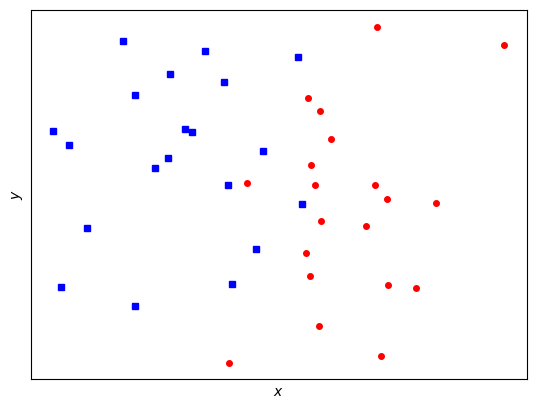

In [530]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 4, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 4, alpha = 1)

# hide tickss
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x$', fontsize = 10)
plt.ylabel('$y$', fontsize = 10)
plt.show()

In [531]:
# combine các điểm dữ liệu theo chiều dọc
X = np.concatenate((X0, X1), axis=0) #X.shape = (2N, 2)
print(X.shape)

(40, 2)


In [532]:
# Tạo labels
y = np.concatenate((np.ones(N,), -1 * np.ones(N,)), axis=0)
print(y.shape)

(40,)


Với V:
$$
V = [y_1 x_1, y_2 x_2, ..., y_N x_N]
$$
Hàm đối ngẫu Lagrange:
$$
g(\lambda) = -\frac{1}{2} \lambda^T V^T V \lambda + 1^T \lambda
$$
Đặt:
$$
K = V^T V
$$
K là ma trận xác định dương. <br>
Nhờ đó ta có được hàm concave:
$$
g(\lambda) = - \frac{1}{2} \lambda^T K \lambda + 1^T \lambda
$$

In [533]:
# Tạo matrix V
V = np.concatenate((X0.T, -X1.T), axis=1)

In [534]:
# Tạo matrix K
K = matrix(V.T.dot(V))

 $$
 \lambda^* = \underset{\lambda}{\operatorname{argmax}} g(\lambda)
 $$
 Dạng Quadratic Programming:
 $$
 \lambda^* = \underset{\lambda}{\operatorname{argmin}} (-g(\lambda))
 = \underset{\lambda}{\operatorname{argmin}}(\frac{1}{2} \lambda^T K \lambda - 1^T \lambda)
 $$
 Subject to:
 $$
 \sum_{i=1}^{N} \lambda_i y_i = 0
 $$
  $$
  0 \leq \lambda_i \leq C
 $$
$$
 ∀ i \in {1, 2,.., N}
$$
Đây chính là các ràng buộc cho dạng Quadratic Programming:
$$
Ax = b
$$
$$
Gx \preceq h
$$

In [535]:
"""
q = -1^T
P = K
Gx <= h
(1/2) x^T P x + p x
sol = solvers.qp(P, p, G, h, A, b)
"""

#Chọn C
C = 10

"""
Lập ràng buộc cho \lambda
có tổng cộng 2 * N điểm dữ liệu cho X
Vì 0 <= \lambda_i <= C nên G kích thước là (4 * N, 2 * N)
Nếu chỉ có điều kiện 0 <= lambda_i thì G kích thước là (2 * N, 2 * N)
<Buộc h có số cột là 1, số hàng tương ứng với số điểm dữ liệu * số ràng buộc>
"""
G = matrix(np.concatenate((-np.eye(2 * N), np.eye(2 * N)), axis=0))
h = matrix(np.concatenate((np.zeros((2 * N, 1)), C * np.ones((2 * N, 1))), axis=0))

"""
# lập ràng buộc cho \lambda_i y_i (tìm được nhờ đạo hàm w, b)
# A bắt buộc là ma trận có (2 * N) cột tương ứng với số điểm dữ liệu, và b có 1 cột duy nhất
"""
A = matrix(y.reshape((-1, 2 * N)))
b = matrix(np.zeros((1, 1))) 

# p = (-1)^T
p = matrix(-np.ones((2 * N, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

In [536]:
# quan sát lambda
l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[4.25121345e-09 9.99999997e+00 7.09074718e+00 3.71691316e-09
  7.61727769e+00 2.24228664e-09 9.99999999e+00 1.72080397e-08
  4.93797165e-09 1.95273976e-09 2.29846698e-09 4.49524098e-09
  1.79460229e-09 7.95589558e-09 2.58644414e-09 9.99999997e+00
  2.15022476e-09 4.93900829e-09 3.39390491e-09 5.55540999e-09
  5.34354149e-09 9.99999998e+00 2.75286245e-09 7.64322793e-09
  3.18104190e-09 1.36005598e-08 4.39620594e-09 9.99999999e+00
  1.70627168e-08 9.99999976e+00 5.40275102e-09 1.16522881e-08
  4.70802504e+00 1.37585290e-08 2.75665332e-09 1.26790102e-08
  9.99999998e+00 1.12270687e-08 2.29647339e-09 3.47105385e-09]]


$$
S =  \left \{ 0 < \lambda_i \leq C \right \}
$$

$$
w = \sum_{i \in S}^{} \lambda_i y_i x_i = V_{i \in S} \lambda_{i \in S}
$$


In [537]:

""" Chọn epsilon, vì đa số các \lambda_i = 0"""
epsilon = 1e-6
"""
support vectors
Với bài toán Hard Margin: 
-> lambda > 0 biểu thị điểm dữ liệu đó là support vector
VS = Matrix của V, V[xi * yi ...] với i thuộc 1,..., n; lấy trong matrix V thỏa các điều kiện này
lS = Matrix của lambda, tương tự
"""
S = np.where(l > 1e-5)[0]
VS = V[:, S]
lS = l[S]
w = VS.dot(lS).reshape(-1, 1)

$$
M =  \left \{ 0 < \lambda_i < C \right \}
$$

$$
b = \frac{1}{N_M} \sum_{i \in M}^{} (y_i - w^T x_i) 
$$

In [541]:
"""
M: index thỏa các \lambda > 0 và nhỏ hơn C: 
Đây là các lambda thỏa ràng buộc của tối ưu lồi
XT = Chuyển vị của X, shape=(2, 2N) hay (features, số điểm dữ liệu)
"""
M = np.where((l > epsilon) & (l < .999 * C))[0]
XT = X.T 

"""
Tính w dựa trên biểu thức đạo hàm theo w dạng Lagragian của bài toán
"""
yM = y[M]
XM = XT[:, M]

# Tính b bằng cách lấy trung bình các cách tính b
b = np.mean(yM.T - w.T.dot(XM))

In [542]:
print('w = ', w.T)
print('b = ', b)

w =  [[-3.31922892  0.84817374]]
b =  9.503479577573517


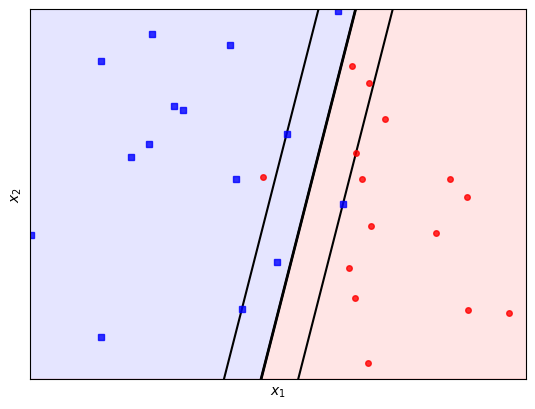

In [543]:
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)

y_center = -w[0, 0]/w[1, 0] * x1 - b / w[1, 0]
y2 = -w[0, 0]/w[1, 0] * x1 - (b - 1) / w[1, 0]
y3 = -w[0, 0]/w[1, 0] * x1 - (b + 1) / w[1, 0]

plt.plot(x1, y_center, 'k', linewidth=2)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

y4 = 10 * x1
plt.plot(x1, y_center, 'k')
plt.fill_between(x1, y_center, color='red', alpha=0.1)
plt.fill_between(x1, y_center, y4, color='blue', alpha=0.1)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=4, alpha=0.8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=4, alpha=0.8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# Hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize=10)
plt.ylabel('$x_2$', fontsize=10)

plt.show()